In [1]:
import os
import tensorflow as tf
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle
from keras import Sequential
from keras.layers import *
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
import datetime as dt
import sys

seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

SEQUENCE_LENGTH = 25
IMAGE_HEIGHT,IMAGE_WIDTH = 600,900
CLASSES_LIST = ['away','map','photo','trap','son','where','breakfast','deaf','bright']

# data_dir = os.path.join('datasets','argentinian')
data_dir = os.path.join('datasets','Augmented')

(220, 340)
(220, 340)
(220, 340)
(220, 340)


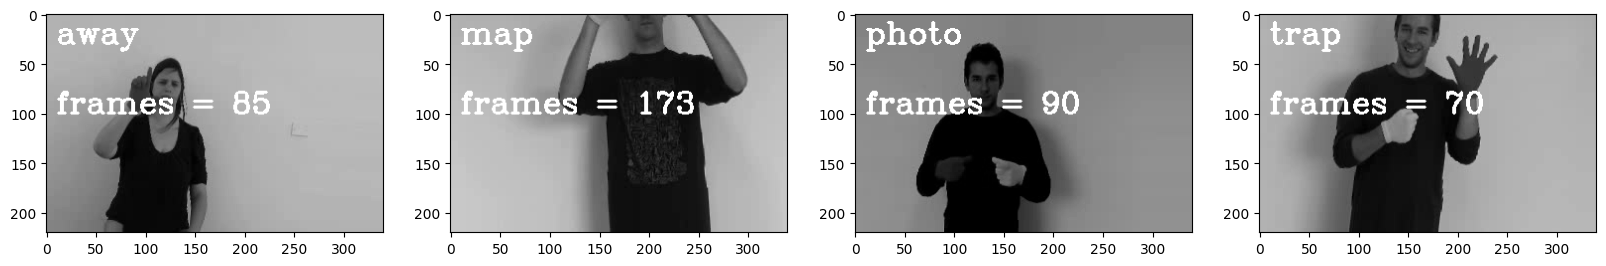

In [3]:
all_class_names = os.listdir(data_dir)

# random_range = random.sample(range(len(all_class_names)),20)
random_range = [0,1,2,3]

plt.figure(figsize=(20,20))

for counter,random_index in enumerate(random_range,1):
    selected_class_name = all_class_names[random_index]
    video_files_names_list = os.listdir(os.path.join(data_dir,selected_class_name))
    selected_video_file_name = random.choice(video_files_names_list)
    
    cap = cv2.VideoCapture(os.path.join(data_dir,selected_class_name,selected_video_file_name))
    
    ret,frame = cap.read()
    video_frames_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    frame = cv2.resize(frame,(IMAGE_WIDTH,IMAGE_HEIGHT))
  
    # frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(frame.shape)
   
    
    cv2.putText(frame,selected_class_name,(10,30),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
    cv2.putText(frame,'frames = {}'.format(video_frames_count),(10,100),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
    
    plt.subplot(5,4,counter)
    plt.imshow(frame,cmap='gray')

In [142]:
def frame_extraction(video_path):
    
    frames_list = []
    
    cap = cv2.VideoCapture(video_path)
    
    video_frames_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)
    
    for frame_counter in range(SEQUENCE_LENGTH):
        
        cap.set(cv2.CAP_PROP_POS_FRAMES,frame_counter * skip_frames_window)
        
        ret,frame = cap.read()
        
        if not ret:
            break
            
        resized_frame = cv2.resize(frame,(IMAGE_WIDTH,IMAGE_HEIGHT))
    
        gray = cv2.cvtColor(resized_frame,cv2.COLOR_BGR2GRAY)
        
        normalized_frame = (gray/255.0).astype(np.float32)
        
        frames_list.append(normalized_frame)
        
    cap.release()
    
    return frames_list

In [143]:
def create_dataset():
    features = []
    labels = []
    
    for class_index, class_name in enumerate(CLASSES_LIST):
        print(f'Extracting Data of class : {class_name}')
        
        files_list = os.listdir(os.path.join(data_dir,class_name))
        
        for file_name in files_list:
            video_file_path = os.path.join(data_dir,class_name,file_name)
            
            frames = frame_extraction(video_file_path)
            
            if len(frames) == SEQUENCE_LENGTH:
                features.append(frames)
                labels.append(class_index)
                
                
    features = np.array(features)
    labels = np.array(labels)
    
    return features,labels

In [119]:
features,labels = create_dataset()

Extracting Data of class : away
Extracting Data of class : map
Extracting Data of class : photo
Extracting Data of class : trap


In [120]:
features[0][0].shape

(220, 340)

In [121]:
type(labels[0])

numpy.int32

In [122]:
features.shape

(1600, 25, 220, 340)

In [123]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3]), array([400, 400, 400, 400], dtype=int64))

In [124]:
one_hot_encoded_labels = to_categorical(labels).astype(int)

In [125]:
one_hot_encoded_labels.shape

(1600, 4)

In [126]:
type(one_hot_encoded_labels[0][0])

numpy.int32

In [127]:
f = open('data.pickle','wb')
pickle.dump({'features' : features,'labels' : one_hot_encoded_labels},f)
f.close()